![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |


How I approached the project

1. Load and inspect the Netflix data

2. Subset the DataFrame for "Movies"

3. Subset the columns of the new DataFrame

4. Filter the DataFrame by Movie duration

5. Assign colors to movie genres 

6.  Plot the movie duration by year using the genre colors created

7.  Subset a new DF excluding specific movie genres: Children, Stand-up, Documentaries

8.  Calculate the median duration of movie groupped by every 10 years.

9.  Plot the median movie duration by periods of time 

10.  Answer "Are we certain that movies are getting shorter?"

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

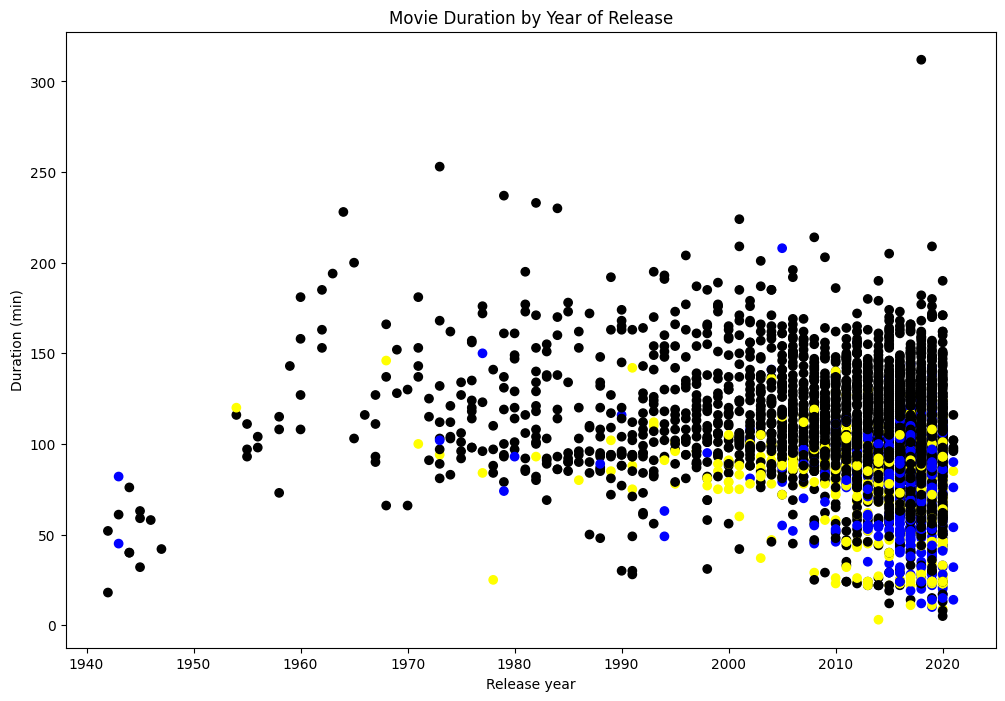

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95
  period_of_years  duration
0     before 1950     106.0
1           1950s     137.0
2           1960s     116.5
3           1970s     108.0
4           1980s     111.0
5           1990s     113.0
6          2000s+     100.5


/var/folders/47/fx9zszd911d2xl2hklmrb3040000gn/T/ipykernel_30280/3028918233.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_year_duration = netflix_movies.groupby('period_of_years')['duration'].median().reset_index()


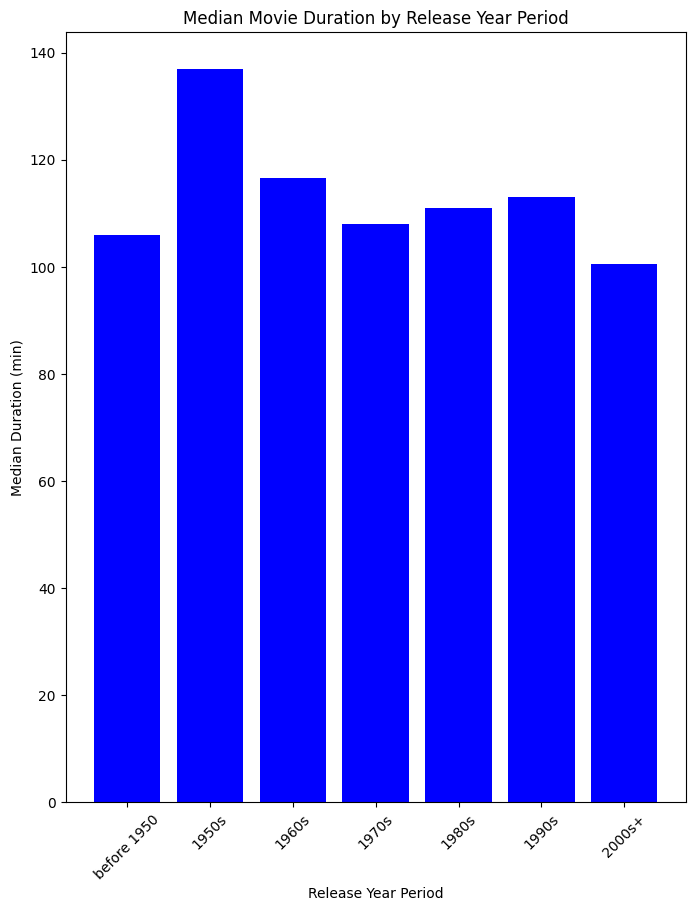

In [12]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Start coding!

# Create netflit_df and print first 5 rows
netflix_df = pd.read_csv("netflix_data.csv")

# Subset for Movie type and only necessary columns
netflix_subset = netflix_df[netflix_df['type']=='Movie']
netflix_movies = netflix_subset[['title','country', 'genre', 'release_year','duration']]

# Filter the df by movie duration
short_movies = netflix_movies[netflix_movies['duration']<60]
print(short_movies.head(20))

# Assign colors to movie genres:
colors = []
for lab,row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('yellow')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-up':
        colors.append('red')
    else:
        colors.append('black')
    
# Plot the movie duration by years with the genre colors created:
fig = plt.figure(figsize=(12,8))
plt.scatter(data= netflix_movies, x='release_year',y='duration',c = colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title("Movie Duration by Year of Release")
plt.show()

# Filter out Children, Documentaries and Stand-up genre. 
filtered_genres = ['Children', 'Documentaries', 'Stand-up']
netflix_movies = netflix_movies[~netflix_movies['genre'].isin(filtered_genres)]

# Convert release_year to integer
netflix_movies['release_year'] = pd.to_numeric(netflix_movies['release_year'])
print(netflix_movies.head())

# Assign period of years
netflix_movies['period_of_years'] = pd.cut(netflix_movies['release_year'],bins=[1949,1959,1969,1979,1989,1999,2009,float('inf')],
                                                                                labels=['before 1950', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s+'])
# Calculate median duration by year periods
per_year_duration = netflix_movies.groupby('period_of_years')['duration'].median().reset_index()
print(per_year_duration)

# Plot median duration by release year period
plt.figure(figsize=(8, 10))
plt.bar(per_year_duration['period_of_years'], per_year_duration['duration'], color='blue')
plt.xlabel('Release Year Period')
plt.ylabel('Median Duration (min)')
plt.title('Median Movie Duration by Release Year Period')
plt.xticks(rotation=45)
plt.show()

# Answer "Are we certain that movies are getting shorter?"

#Non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot all the time. While it is clear that in the recent years, the number of short movies increased, the median of movie duration has been also fluatuaing. Therefore:

answer ='no'